In [37]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
def find_file_with_id(file_id,root_dir='../results'):
    """Find a file containing the given ID in the results directory structure"""
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if file_id in filename:
                # Return path relative to current directory
                return os.path.relpath(os.path.join(dirpath, filename))
    return None

Keys in the file: ['archive', 'artiq_version', 'datasets', 'expid', 'rid', 'run_time', 'start_time']
<KeysViewHDF5 ['__param__VdP2mode', '__param__qubit', 'beta_index', 'cal_count', 'cal_fit_signal', 'cal_freq', 'cal_motion_count', 'cal_motion_fit_signal', 'cal_motion_freq', 'cal_motion_pos', 'cal_pos', 'pmt_counts', 'pmt_counts_avg_thresholded', 'pmt_counts_avg_thresholded2', 'pos']>
(441, 50)


Text(0, 0.5, '<z>')

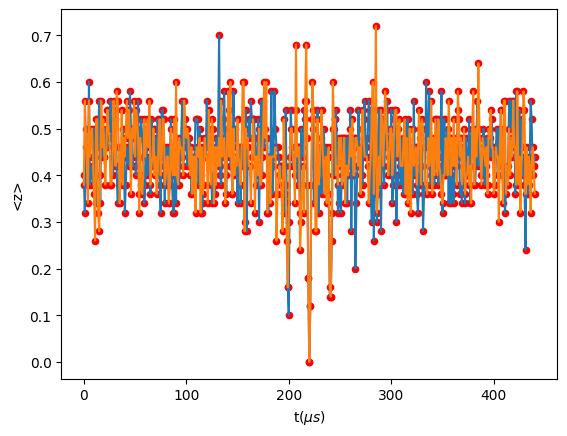

In [38]:
# Path to your .h5 file
file_path=find_file_with_id(file_id='81914')
#-A4_Vdp_Wigner_2D.h5'

# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Print the names of the groups/datasets in the file
    print("Keys in the file:", list(file.keys()))
    
    # Assuming there's a dataset named 'data' in the file
    # Modify this part according to your file's structure
    data = file['datasets']
    print(file['datasets'].keys())

    # print(file['archive'].keys())
    # print(file['archive']['__param__SDF'].keys())

    # print(file['expid'][()])


    rabi_t= data['beta_index'][:]
    pmt_count_re=data['pmt_counts_avg_thresholded'][:]
    pmt_count_im=data['pmt_counts_avg_thresholded2'][:]
    
  

    
    pmt_count=data['pmt_counts'][:]
    # pmt_count_re = np.average(pmt_count[:,:25],axis=1)[:441]

    print(np.shape(pmt_count))


plt.figure()
plt.plot(rabi_t, pmt_count_re)
plt.plot(rabi_t, pmt_count_im)
plt.scatter(rabi_t, pmt_count_re,c='red',s=20)
plt.scatter(rabi_t, pmt_count_im,c='red',s=20)
plt.xlabel('${\\rm t}(\mu s)$')
plt.ylabel('<z>')





(441, 50)
(441,)


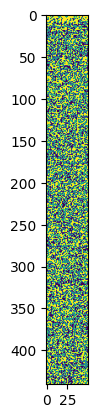

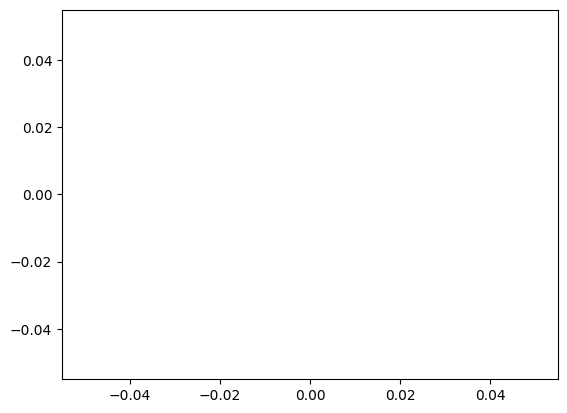

In [39]:

print(pmt_count.shape)
print(np.sum(pmt_count,axis=1).shape)
plt.imshow(pmt_count)
plt.show()

plt.plot(np.sum(pmt_count,axis=1)[:len(pmt_count)//2])
plt.plot(np.sum(pmt_count,axis=1)[len(pmt_count)//2:])
plt.show()

In [40]:
# plt.plot(pmt_count_re-np.sum(pmt_count,axis=1)[:len(pmt_count)//2]/50)
# plt.plot(pmt_count_im-np.sum(pmt_count,axis=1)[len(pmt_count)//2:]/50)
# plt.show()

In [41]:
pmt_count_re=pmt_count_re.reshape(int(np.sqrt(len(pmt_count_re))),int(np.sqrt(len(pmt_count_re))))
pmt_count_im=pmt_count_im.reshape(int(np.sqrt(len(pmt_count_im))),int(np.sqrt(len(pmt_count_im))))
# pmt_count_re[12, 0]=np.nan
# for i in range(len(pmt_count_re)):
#     for j in range(len(pmt_count_re[i])):
#         if pmt_count_re[i][j]==0 or np.isnan(pmt_count_re[i][j]):
#             if i>0 and i<len(pmt_count_re)-1 and j>0 and j<len(pmt_count_re[i])-1:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j-1]+pmt_count_re[i][j+1]+pmt_count_re[i-1][j]+pmt_count_re[i+1][j])/4
#             elif i==0 and j>0 and j<len(pmt_count_re[i])-1:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j-1]+pmt_count_re[i][j+1]+pmt_count_re[i+1][j])/3
#             elif i==len(pmt_count_re)-1 and j>0 and j<len(pmt_count_re[i])-1:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j-1]+pmt_count_re[i][j+1]+pmt_count_re[i-1][j])/3
#             elif j==0 and i>0 and i<len(pmt_count_re)-1:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j+1]+pmt_count_re[i-1][j]+pmt_count_re[i+1][j])/3
#             elif j==len(pmt_count_re[i])-1 and i>0 and i<len(pmt_count_re)-1:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j-1]+pmt_count_re[i-1][j]+pmt_count_re[i+1][j])/3
#             elif i==0 and j==0:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j+1]+pmt_count_re[i+1][j])/2
#             elif i==0 and j==len(pmt_count_re[i])-1:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j-1]+pmt_count_re[i+1][j])/2
#             elif i==len(pmt_count_re)-1 and j==0:  
#                 pmt_count_re[i][j]=(pmt_count_re[i][j+1]+pmt_count_re[i-1][j])/2
#             elif i==len(pmt_count_re)-1 and j==len(pmt_count_re[i])-1:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j-1]+pmt_count_re[i-1][j])/2
#             elif i==0 and j==0:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j+1]+pmt_count_re[i+1][j])/2
#             elif i==0 and j==len(pmt_count_re[i])-1:
#                 pmt_count_re[i][j]=(pmt_count_re[i][j-1]+pmt_count_re[i+1][j])/2

In [42]:
# pad=4

# pmt_count_im=pmt_count_im[pad:-pad,pad:-pad]
# pmt_count_re=pmt_count_re[pad:-pad,pad:-pad]


# pad_val_re=0.49
# pad_val_im=+0.49
# pmt_count_im[np.isnan(pmt_count_im)]=pad_val_im
# pmt_count_re[np.isnan(pmt_count_re)]=pad_val_re

In [43]:
# eta=0.134
# Rabi_readout=0.08*2*np.pi
# beta_time_range_us = 30

# eta=0.071655
# Rabi_readout=0.08*2*np.pi
# beta_time_range_us = 75


eta=0.09
Rabi_readout=0.08*2*np.pi
beta_time_range_us = 30
print(beta_time_range_us*eta*Rabi_readout)

1.3571680263507906


In [44]:
np.shape(pmt_count_re)

(21, 21)

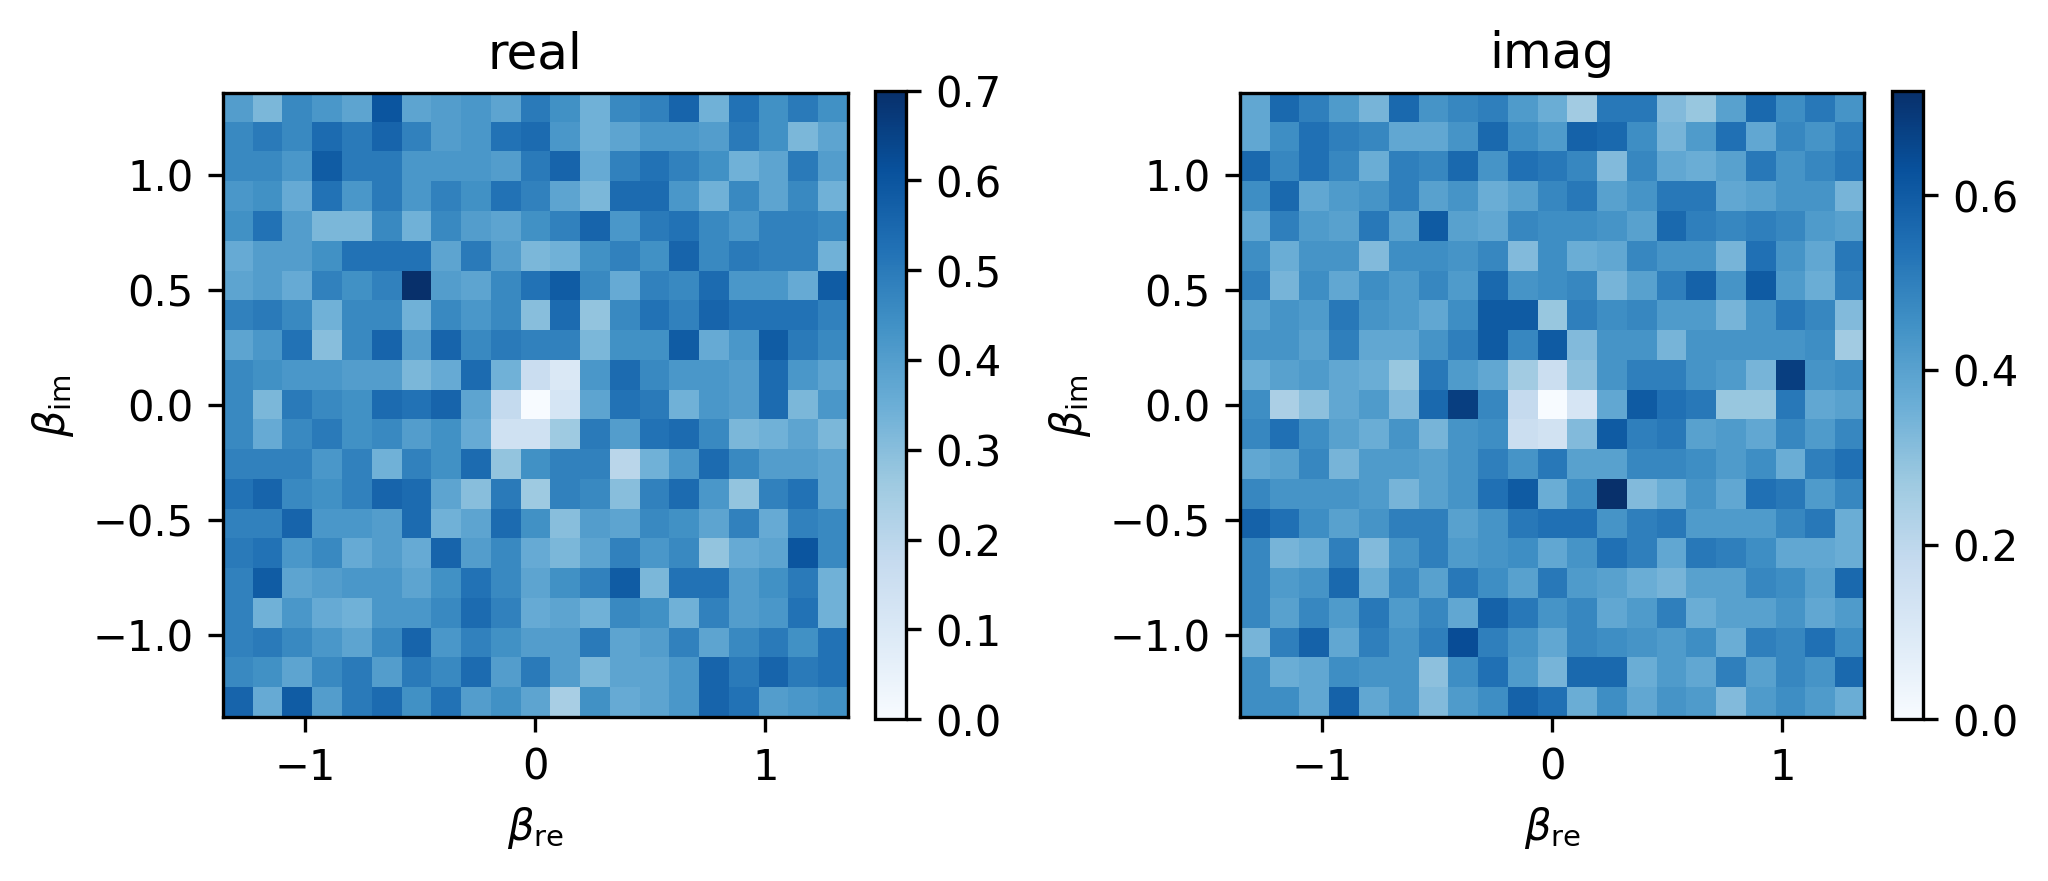

In [45]:
import matplotlib.colors as mcolors
cmap = plt.cm.Blues # You can choose any colormap
cmap = cmap.copy()     # Copy the colormap to modify it
cmap.set_bad(color='gray')  # Set NaN values to gray

beta_range=eta*Rabi_readout*beta_time_range_us

# Create a figure with 2 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5),dpi=300)

# Plot the first image
im1 = ax1.imshow(pmt_count_re, cmap=cmap, extent=[-beta_range,beta_range,-beta_range,beta_range])
ax1.title.set_text('real')
ax1.set_xlabel('$\\beta_{\\rm re}$')
ax1.set_ylabel('$\\beta_{\\rm im}$')
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)   # Add a colorbar to the first subplot

#Plot the second image
im2 = ax2.imshow(pmt_count_im, cmap=cmap, extent=[-beta_range,beta_range,-beta_range,beta_range])
ax2.title.set_text('imag')
ax2.set_xlabel('$\\beta_{\\rm re}$')
ax2.set_ylabel('$\\beta_{\\rm im}$')
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)   # Add a colorbar to the second subplot

# Make the third subplot invisible
ax3.set_visible(False)

# Show the plot
plt.tight_layout()  # Adjust layout to fit elements

(0.4428571428571429+0.4459591836734694j)


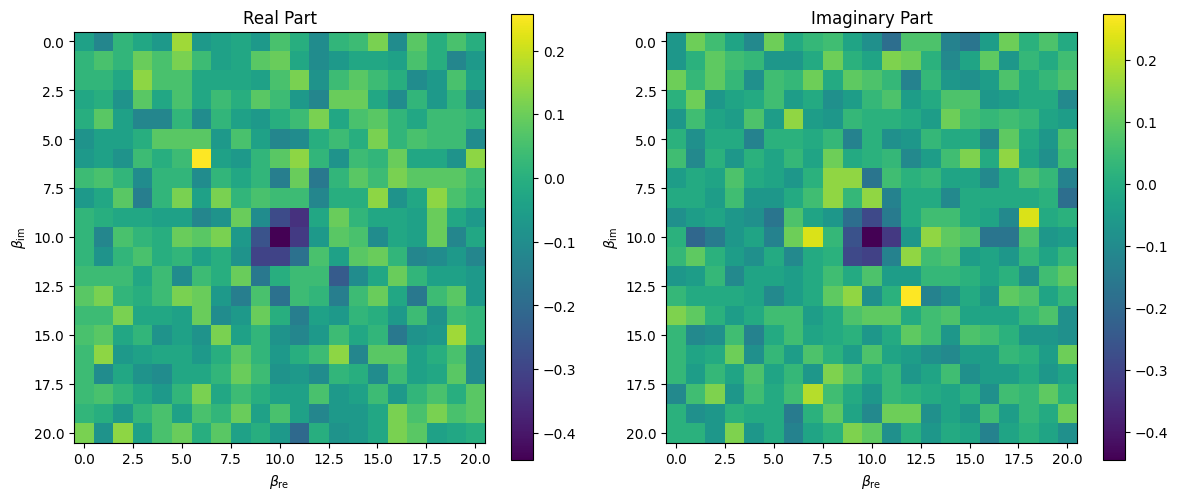

In [46]:
pmt_count_tmp=pmt_count_re*1.0+1.0j*pmt_count_im

# pmt_count_tmp=np.nan_to_num(pmt_count_tmp, nan=0)
L=len(pmt_count_tmp)
offset=(np.sum(pmt_count_tmp)-np.sum(pmt_count_tmp[L//6:L*5//6, L//6:L*5//6]))/(L*L-(L*5//6-L//6)**2)
offset+=0.00
print(offset)
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Plot real part
im1 = ax1.imshow(np.real((pmt_count_tmp-offset)))
ax1.set_title('Real Part')
ax1.set_xlabel('$\\beta_{\\rm re}$')
ax1.set_ylabel('$\\beta_{\\rm im}$')
fig.colorbar(im1, ax=ax1)
# Plot imaginary part
im2 = ax2.imshow(np.imag((pmt_count_tmp-offset)))
ax2.set_title('Imaginary Part')
ax2.set_xlabel('$\\beta_{\\rm re}$')
ax2.set_ylabel('$\\beta_{\\rm im}$')
fig.colorbar(im2, ax=ax2)
plt.tight_layout()

In [47]:
def spatial_lowpass_filter(data, cutoff_freq):
    """
    Apply spatial low pass filter to 2D data using FFT
    
    Parameters:
    data: 2D numpy array
    cutoff_freq: cutoff frequency (in pixels)
    
    Returns:
    filtered_data: 2D numpy array after filtering
    """
    # Get dimensions
    rows, cols = data.shape
    
    # Create frequency meshgrid
    u = np.fft.fftfreq(rows)
    v = np.fft.fftfreq(cols)
    U, V = np.meshgrid(u, v)
    
    # Calculate distance from center
    D = np.sqrt(U**2 + V**2)
    
    # Create low pass filter
    H = np.zeros_like(D)
    H[D <= cutoff_freq] = 1
    
    # Apply FFT
    F = np.fft.fft2(data)
    
    # Apply filter
    G = F * H
    
    # Inverse FFT
    filtered_data = np.real(np.fft.ifft2(G))
    
    return filtered_data

# # Apply filter to real and imaginary parts separately
# cutoff = 0.4 # Adjust this value to control filtering strength
# filtered_real = spatial_lowpass_filter(np.real(pmt_count_tmp-offset), cutoff)
# filtered_imag = spatial_lowpass_filter(np.imag(pmt_count_tmp-offset), cutoff)
# filtered_data = filtered_real + 1j * filtered_imag


Text(0.5, 1.0, 'symmetric')

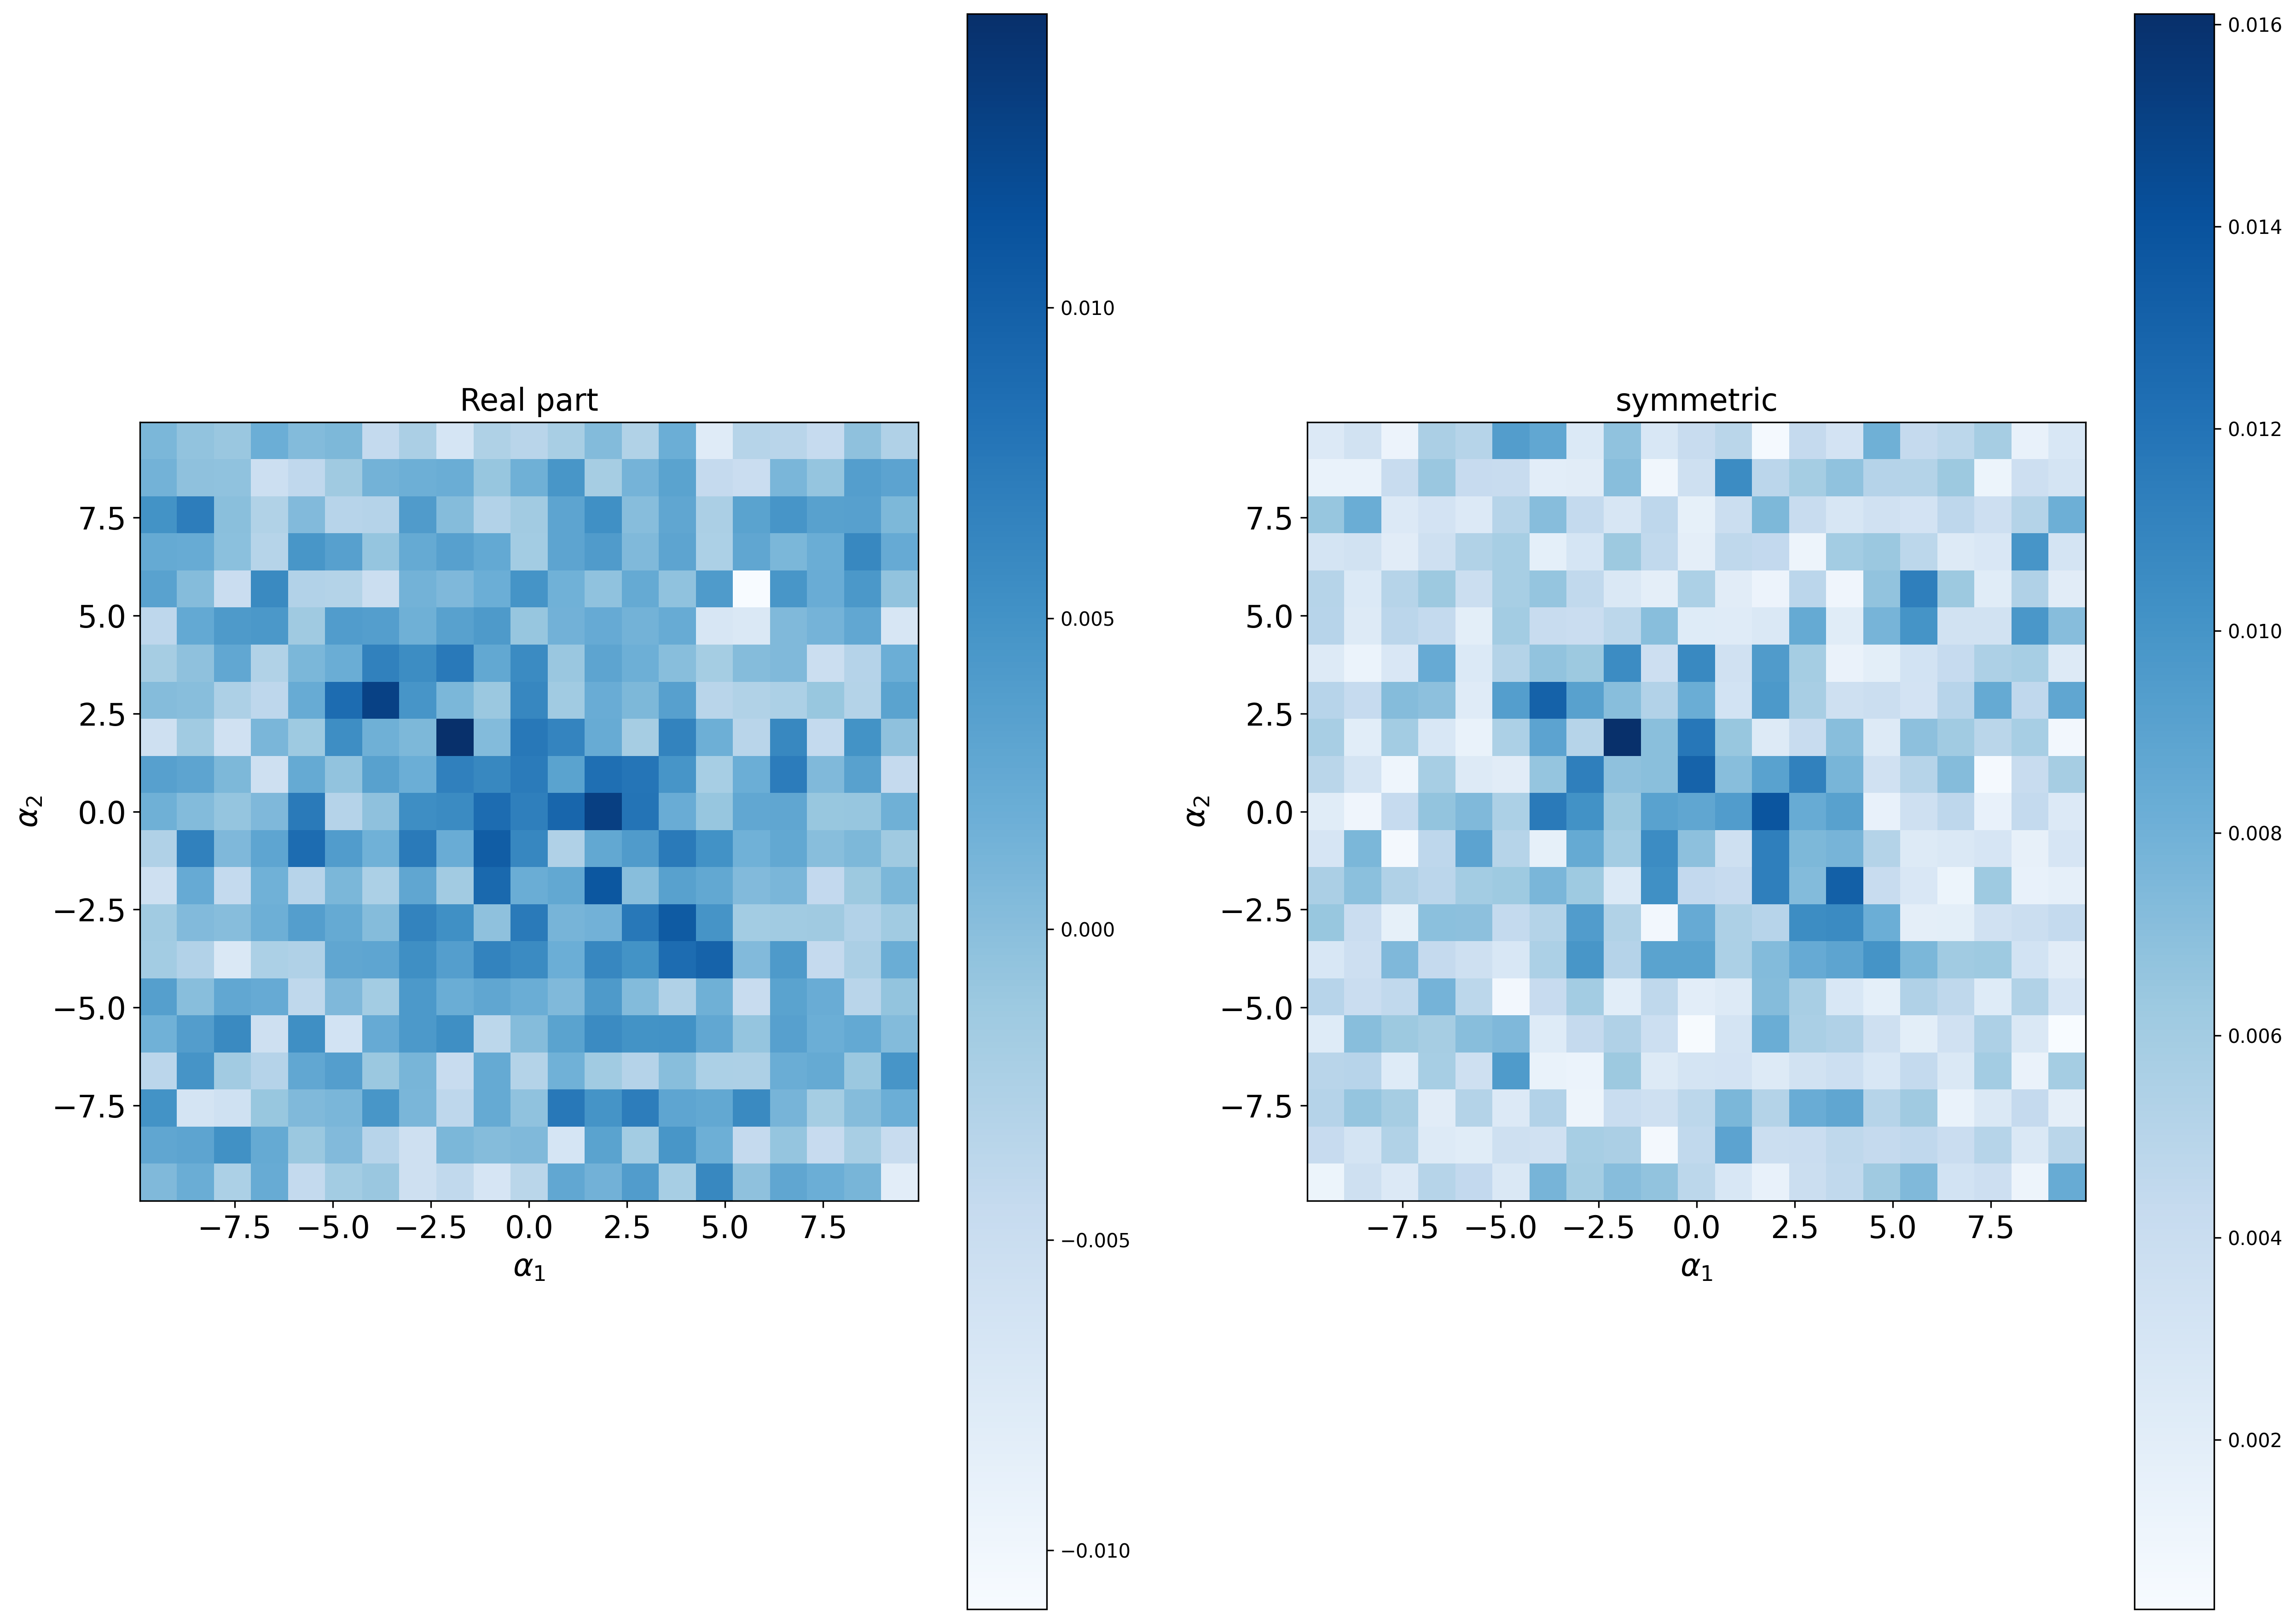

In [48]:
#pmt_count_tmp=pmt_count.copy()
# pmt_count_tmp=pmt_count_re+1.0j*pmt_count_im

pmt_count_tmp=np.nan_to_num(pmt_count_tmp, nan=0)

#padding
pmt_padding = np.pad(pmt_count_tmp-offset, pad_width=0, mode='constant', constant_values=0.)



#shift the data to the center
pmt_padding_shift=np.zeros((len(pmt_padding),len(pmt_padding)), dtype=complex)
pmt_padding_shift[len(pmt_padding)//2+1:,len(pmt_padding)//2+1:]=pmt_padding[:len(pmt_padding)//2,:len(pmt_padding)//2]
pmt_padding_shift[:len(pmt_padding)//2+1,:len(pmt_padding)//2+1]=pmt_padding[len(pmt_padding)//2:,len(pmt_padding)//2:]
pmt_padding_shift[:len(pmt_padding)//2+1,len(pmt_padding)//2+1:]=pmt_padding[len(pmt_padding)//2:,:len(pmt_padding)//2]
pmt_padding_shift[len(pmt_padding)//2+1:,:len(pmt_padding)//2+1]=pmt_padding[:len(pmt_padding)//2,len(pmt_padding)//2:]

# Apply Gaussian window to data before FFT
sigma = 50# Width of Gaussian window
x = np.linspace(0, len(pmt_padding), len(pmt_padding))
y = np.linspace(0, len(pmt_padding), len(pmt_padding))
X, Y = np.meshgrid(x, y)
gaussian = np.exp(-(X**2 + Y**2)/(2*sigma**2))
gaussian = gaussian / gaussian.sum()  # Normalize

# Multiply data by window function then take FFT
chi_transformed = np.fft.fft2(pmt_padding_shift * gaussian)

# chi = chi_transformed
fft_tmp = np.fft.fftshift(chi_transformed)
#np.fft.fftshift(np.fft.fft2(pmt_padding_shift))

# fft_tmp_r=spatial_lowpass_filter(fft_tmp.real, 0.3)
# fft_tmp_i=spatial_lowpass_filter(fft_tmp.imag, 0.3)
# fft_tmp=fft_tmp_r+1.0j*fft_tmp_i


alpha_axis1=np.fft.fftshift(np.fft.fftfreq(len(pmt_padding), 2*np.abs(beta_range)/(len(pmt_count_tmp)-1)))*2*np.sqrt(2) #factors for be consistent with qutip wigner 

alpha_axis2=np.fft.fftshift(np.fft.fftfreq(len(pmt_padding), 2*np.abs(beta_range)/(len(pmt_count_tmp)-1)))*2*np.sqrt(2)


plt.figure(figsize=(20,15), dpi=300)

plt.subplot(121)
plt.imshow(-np.real(fft_tmp), cmap=cmap,  extent=[alpha_axis1[0], alpha_axis1[-1], alpha_axis2[0], alpha_axis2[-1]])
plt.xlabel('$\\alpha_1$',fontsize=16)
plt.ylabel('$\\alpha_2$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()
plt.title('Real part', fontsize=16)

#
plt.subplot(122)
plt.imshow(np.abs(fft_tmp), cmap=cmap,extent=[alpha_axis1[0], alpha_axis1[-1], alpha_axis2[0], alpha_axis2[-1]])
plt.xlabel('$\\alpha_1$',fontsize=16)
plt.ylabel('$\\alpha_2$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()
plt.title('symmetric', fontsize=16)


